In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/teamspace/studios/this_studio/dataset/Resume/Resume.csv')
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [9]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [10]:
for col in df.columns:
    empty_rows = df[df[col] == '']
    print(empty_rows)


Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []
Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []
Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []
Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []


In [11]:
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [12]:
# adding random suffle of the data
df= df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
df.head()

ID                                         Resume_str  \
0  99244405             Kpandipou    Koffi         Summary ...   
1  17562754           DIRECTOR OF DIGITAL TRANSFORMATION   ...   
2  30311725           SENIOR PROJECT MANAGER       Professi...   
3  19007667           CHEF       Summary     Experienced ca...   
4  11065180           OPERATIONS MANAGER       Summary    E...   

                                         Resume_html       Category  
0  <div class="RNA skn-rbn1 fontsize fontface vma...        TEACHER  
1  <div class="fontsize fontface vmargins hmargin...  DIGITAL-MEDIA  
2  <div class="fontsize fontface vmargins hmargin...   CONSTRUCTION  
3  <div class="fontsize fontface vmargins hmargin...           CHEF  
4  <div class="fontsize fontface vmargins hmargin...        BANKING

# Data Explore

In [14]:
df['Category'].unique()

array(['TEACHER', 'DIGITAL-MEDIA', 'CONSTRUCTION', 'CHEF', 'BANKING',
       'BUSINESS-DEVELOPMENT', 'DESIGNER', 'HEALTHCARE', 'SALES', 'ARTS',
       'AUTOMOBILE', 'ADVOCATE', 'HR', 'CONSULTANT', 'ACCOUNTANT',
       'PUBLIC-RELATIONS', 'AVIATION', 'FITNESS',
       'INFORMATION-TECHNOLOGY', 'ENGINEERING', 'AGRICULTURE', 'APPAREL',
       'FINANCE', 'BPO'], dtype=object)

In [15]:
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

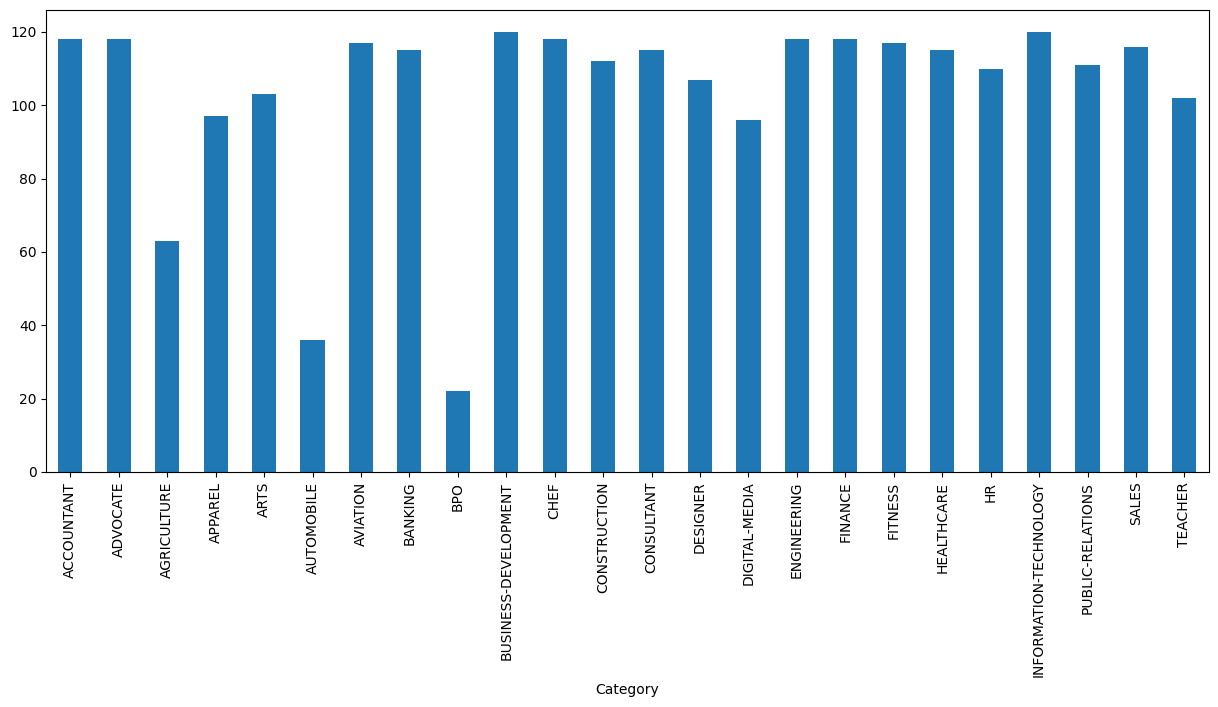

In [12]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
plt.show()

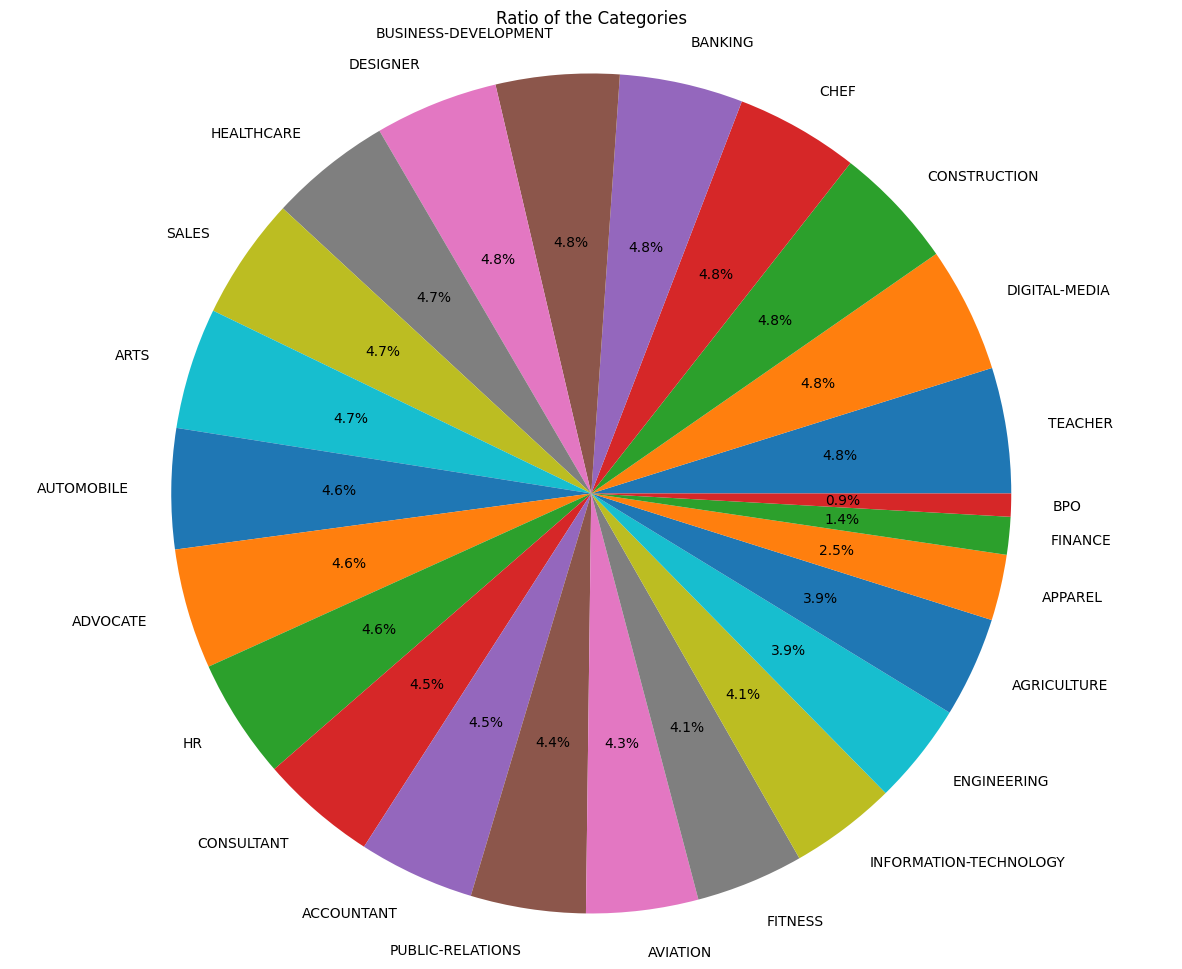

In [16]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()

plt.figure(figsize=(15,12))
plt.pie(counts, labels= labels, autopct='%1.1f%%')
plt.title('Ratio of the Categories')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

data, test_data = train_test_split(df, test_size=0.15, stratify=df['Category'], random_state=42)

# Save the test data to CSV files
test_data.to_csv(r'resume_categorization\data\processed\test_data.csv', index=False)

## Word inspection for the 'Resume_str' columne

Text(0.5, 1.0, 'Word Cloud of Resumes Str')

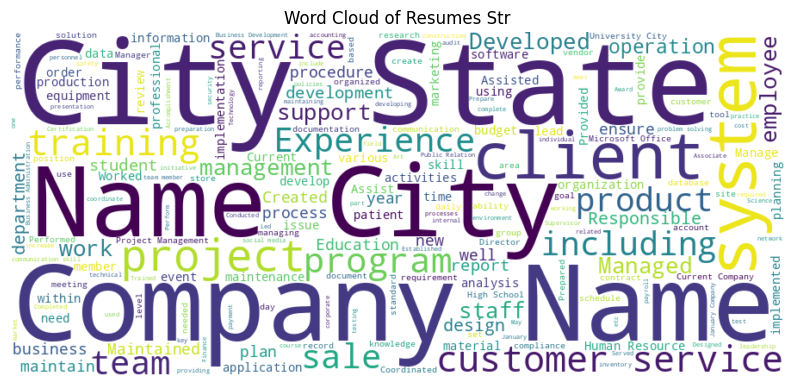

In [17]:
from wordcloud import WordCloud

resume_strs = ' '.join(df['Resume_str'].tolist())

wordcloud = WordCloud(width=900, height=400, background_color='white').generate(resume_strs)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Resumes Str')

Seems like we have many wanted word (city state, Company name ....) in this column, so we have cline this to make it work.

In [10]:
import re
import nltk

In [11]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

def preprocess_resume(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)

    # Remove non-alphanumeric characters, punctuation, digits, and extra whitespace
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'[^\w\s]|_', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub('http\S+\s', " ", text)

    text = text.lower()
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

In [12]:
nltk.download('punkt_tab')
nltk.download('stopwords')

df['Resume'] = df['Resume_str'].apply(lambda w: preprocess_resume(w))
df = df.drop(['Resume_str', 'Resume_html'], axis=1)
df.sample(10)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ID       Category  \
398   51209395        TEACHER   
899   63282405        FITNESS   
2206  11672279        BANKING   
92    23510685             HR   
1277  18927233  DIGITAL-MEDIA   
2315  26079779           ARTS   
1772  10712803    ENGINEERING   
401   11336022        TEACHER   
1647  23190306        APPAREL   
1817  10554236     ACCOUNTANT   

                                                 Resume  
398   preschool teacher profession summari effici ac...  
899   custom servic representact summari energet cus...  
2206  assist vice presid highlight ms offic suit mar...  
92    global hr manag summari global hr profession y...  
1277  digit market coordin skill profession summari ...  
2315  budget administr manag experi budget administr...  
1772  engin servic manag execut profil result driven...  
401   lead teacher summari secur posit util skill wo...  
1647  nd level assist store manag oper manag manag s...  
1817  account summari financi account special financ...

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2484 non-null   int64 
 1   Category  2484 non-null   object
 2   Resume    2484 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [22]:
print(df['Resume'][0])

hr administr market associ hr administr summari dedic custom servic manag year experi hospit custom servic manag respect builder leader custom focus team strive instil share enthusiast commit custom servic highlight focus custom satisfact team manag market savvi conflict resolut techniqu train develop skill multi tasker client relat specialist accomplish missouri dot supervisor train certif certifi ihg custom loyalti market segment hilton worldwid gener manag train certif accomplish trainer cross server hospit system hilton onq micro opera pm fidelio opera reserv system or holidex complet cours seminar custom servic sale strategi inventori control loss prevent safeti time manag leadership perform assess experi hr administr market associ hr administr dec current compani name citi state help develop polici direct coordin activ employ compens labor relat benefit train employe servic prepar employe separ notic relat document keep record benefit plan particip insur pension plan personnel tr

In [15]:
empty_rows = df[df['Resume'] == '']
print(empty_rows)

           ID              Category Resume
656  12632728  BUSINESS-DEVELOPMENT       


In [16]:
resume_data = df.drop(empty_rows.index)

In [17]:
resume_data

ID  Category                                             Resume
0     16852973        HR  hr administr market associ hr administr summar...
1     22323967        HR  hr specialist us hr oper summari versatil medi...
2     33176873        HR  hr director summari year experi recruit plu ye...
3     27018550        HR  hr specialist summari dedic driven dynam year ...
4     17812897        HR  hr manag skill highlight hr skill hr depart st...
...        ...       ...                                                ...
2479  99416532  AVIATION  rank sgt e non commiss offic charg brigad mail...
2480  24589765  AVIATION  govern relat commun organiz develop director p...
2481  31605080  AVIATION  geek squad agent profession profil support spe...
2482  21190805  AVIATION  program director offic manag summari highli pe...
2483  37473139  AVIATION  storekeep ii profession summari purpos documen...

[2483 rows x 3 columns]

In [34]:
df_categories = [resume_data[resume_data['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]

In [19]:
def wordcloud(df):
    txt = ' '.join(txt for txt in resume_data['Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000
    ).generate(txt)

    return wordcloud

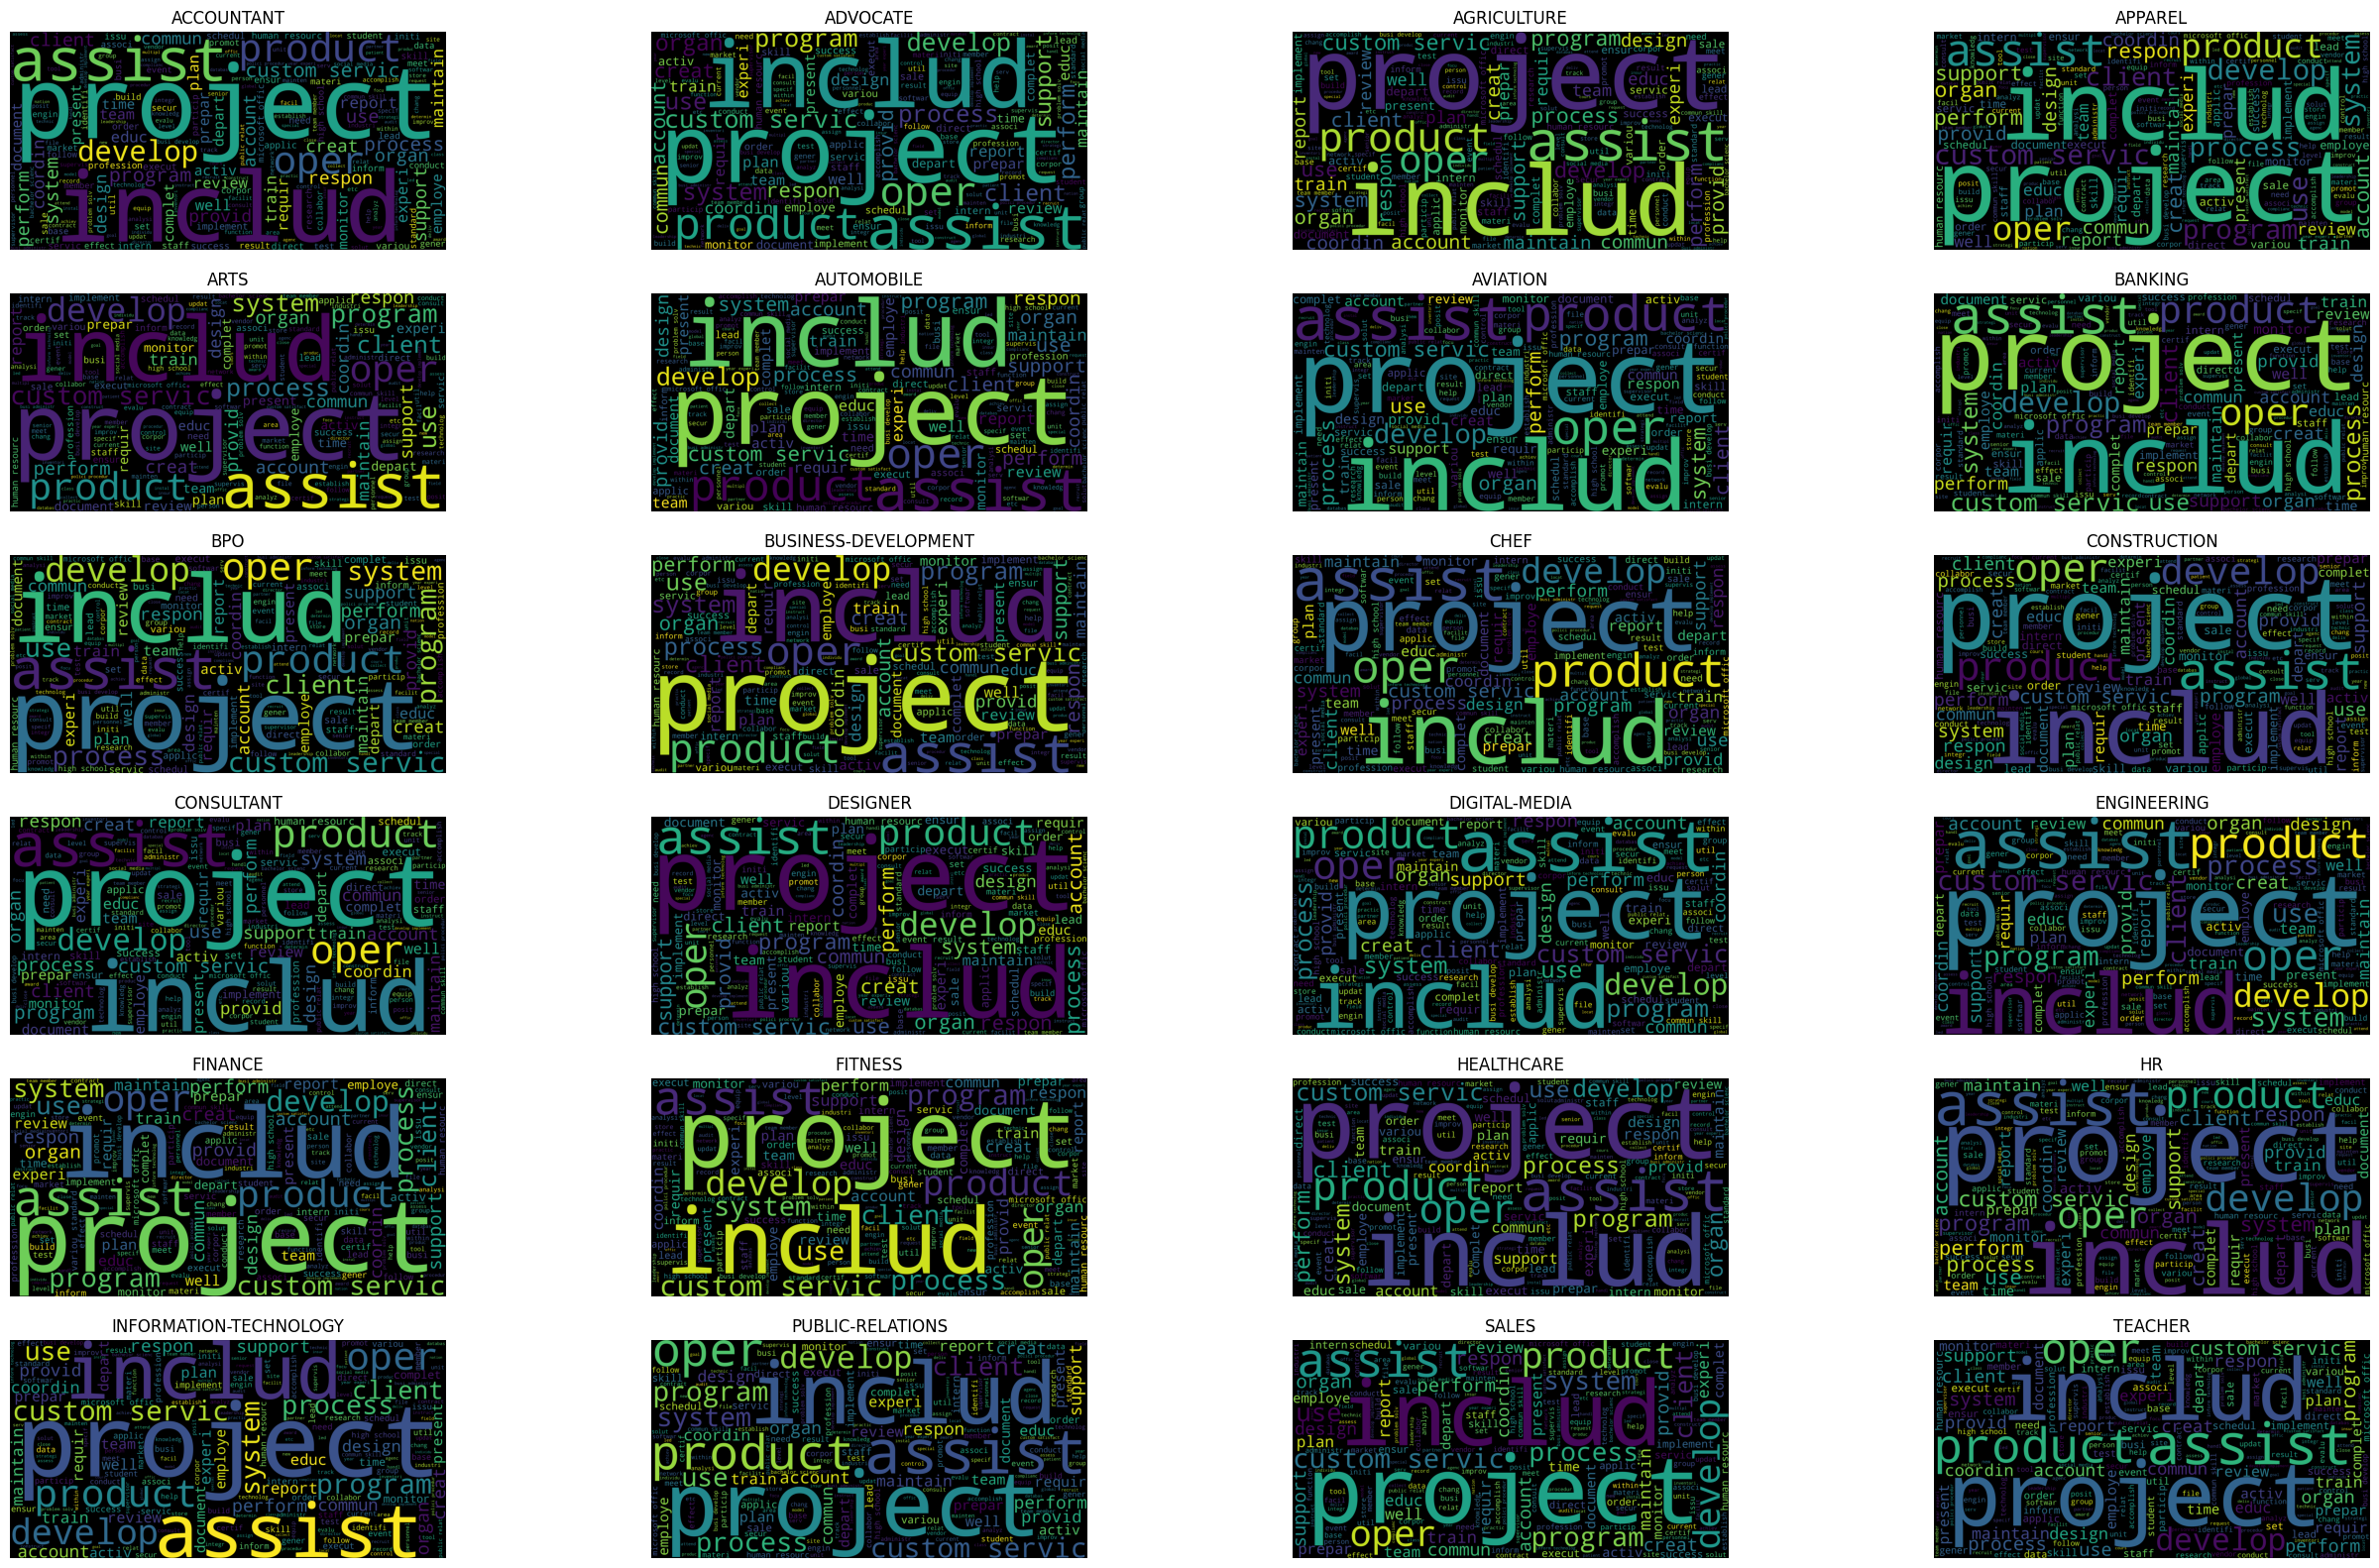

In [28]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(6, 4, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [35]:
def extra_word_remove(text):
    # extra words
    extra_word_1 = [
        'compani', 'name', 'citi', 'state', 'work', 'manag',
        'resume', 'summary', 'profile', 'skills', 'responsibilities',
        'duties', 'tasks', 'job', 'position', 'role', 'employee',
        'staff', 'team', 'leader', 'date', 'year', 'month',
        'day', 'time', 'project', 'experience', 'information',
        'department', 'address', 'location', 'street', 'avenue',
        'place', 'region', 'currently', 'previously', 'education',
        'degree', 'university', 'college'
    ]
    extra_word_2 = [
        'compani', 'name', 'citi', 'state', 'work', 'manag', 'respons', 'role',
        'perform', 'provid', 'skill', 'team', 'result', 'develop', 'process', 'task',
        'ensur', 'support', 'assist', 'help', 'year', 'month', 'experi', 'project',
        'involv', 'includ', 'custom', 'client', 'meet', 'direct', 'implement',
        'execut', 'report', 'maintain', 'oper', 'various', 'handl', 'achiev',
        'train', 'lead', 'coordin', 'staff', 'level', 'career', 'proficient'
    ]
    words = text.split()  # Split the text into words

    # Filter out the extra words
    filter_word = [word for word in words if word not in extra_word_1]

    filter_text = ' '.join(filter_word)

    return filter_text

resume_data['Resume']=resume_data['Resume'].apply(lambda x:remove_extra_word(x))

In [32]:
# df_categories = [resume_data[resume_data['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]


In [36]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(6, 4, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

# Preprocess

Now we will incode our data to feed in the algorithm

In [ ]:
# encode the category lables

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
resume_data['Category'] = enc.fit_transform(resume_data['Category'])

In [ ]:
resume_data.sample(5)

In [ ]:
resume_data['Category'].unique()